<a href="https://colab.research.google.com/github/Anusha-Kasina/weed_detection/blob/master/weed2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
#kaggle username from api token 
os.environ['KAGGLE_USERNAME'] = "anushakasina"
#kaggle key from api token
os.environ['KAGGLE_KEY'] ="ddb898e4090e073a6d8ebd4a4a47701c"
#dataset path for downloading the data
!kaggle datasets download -d fpeccia/weed-detection-in-soybean-crops

100% 2.36G/2.37G [00:40<00:00, 67.8MB/s]
100% 2.37G/2.37G [00:40<00:00, 63.2MB/s]


In [2]:
#upload data
 
#ZipFile is a class of zipfile module for reading and writing zip files
from zipfile import ZipFile
#filename = zip file path 
file_name = "/content/weed-detection-in-soybean-crops.zip"
#to extract the zip file
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [0]:
# !rm -rf test_data

In [0]:
# !rm -rf train_data

In [0]:
os.mkdir("/content/train_data")
os.mkdir("/content/train_data/broadleaf")
os.mkdir("/content/train_data/grass")
os.mkdir("/content/train_data/soil")
os.mkdir("/content/train_data/soybean")


In [0]:
os.mkdir("/content/test_data")
os.mkdir("/content/test_data/broadleaf")
os.mkdir("/content/test_data/grass")
os.mkdir("/content/test_data/soil")
os.mkdir("/content/test_data/soybean")

In [0]:
from shutil import copyfile 
import random

In [6]:
def split_data(source,training,testing,split_size):
  files = []
  for filename in os.listdir(source):
    file = source+filename
    files.append(filename)
    training_length = int(len(files)*split_size)
    shuffled_set = random.sample(files,len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[training_length:]
  for filename in training_set:
    this_file = source+filename 
    destination = training+filename 
    copyfile(this_file,destination)        
  for filename in testing_set:
    this_file = source+filename 
    destination = testing+filename 
    copyfile(this_file,destination)
#split_size = 0.8
split_data("/content/dataset/broadleaf/","/content/train_data/broadleaf/","/content/test_data/broadleaf/",0.8)
split_data("/content/dataset/grass/","/content/train_data/grass/","/content/test_data/grass/",0.8)
split_data("/content/dataset/soil/","/content/train_data/soil/","/content/test_data/soil/",0.8)
split_data("/content/dataset/soybean/","/content/train_data/soybean/","/content/test_data/soybean/",0.8)
print("done")

done


In [7]:
#path, dirs, files = next(os.walk("/content/train_data/grass"))
print(len(os.listdir('/content/train_data/soil')))

2599


In [8]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

Using TensorFlow backend.


In [9]:
train_dir = '/content/train_data'
test_dir = '/content/test_data'

train_gen_obj = ImageDataGenerator(rescale = 1.0/255.0)
test_gen_obj = ImageDataGenerator(rescale = 1.0/255.0)

train_gen = train_gen_obj.flow_from_directory(train_dir, batch_size = 128, target_size = (150, 150), class_mode = 'categorical')
test_gen = test_gen_obj.flow_from_directory(test_dir, batch_size = 64, target_size = (150, 150), class_mode = 'categorical')

Found 12267 images belonging to 4 classes.
Found 3069 images belonging to 4 classes.


In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 128 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(4, activation='softmax')  
])

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)       

In [0]:
# from tensorflow.keras.optimizers import RMSprop

In [0]:
# Compile Model. 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [19]:
# Train the Model
history = model.fit_generator(train_gen,
                              validation_data = test_gen,
                              epochs = 10, verbose = 1)

Epoch 1/10
96/96 [==============================] - 61s 635ms/step - loss: 0.9756 - acc: 0.6204 - val_loss: 0.4862 - val_acc: 0.8166
Epoch 2/10
96/96 [==============================] - 61s 636ms/step - loss: 0.4197 - acc: 0.8369 - val_loss: 0.3885 - val_acc: 0.8543
Epoch 3/10
96/96 [==============================] - 61s 631ms/step - loss: 0.3507 - acc: 0.8662 - val_loss: 0.3447 - val_acc: 0.8700
Epoch 4/10
96/96 [==============================] - 60s 628ms/step - loss: 0.2904 - acc: 0.8947 - val_loss: 0.4034 - val_acc: 0.8364
Epoch 5/10
96/96 [==============================] - 60s 627ms/step - loss: 0.2575 - acc: 0.9045 - val_loss: 0.2857 - val_acc: 0.8935
Epoch 6/10
96/96 [==============================] - 61s 638ms/step - loss: 0.2160 - acc: 0.9229 - val_loss: 0.2348 - val_acc: 0.9127
Epoch 7/10
96/96 [==============================] - 61s 633ms/step - loss: 0.1996 - acc: 0.9271 - val_loss: 0.2916 - val_acc: 0.8879
Epoch 8/10
96/96 [==============================] - 61s 636ms/step - 

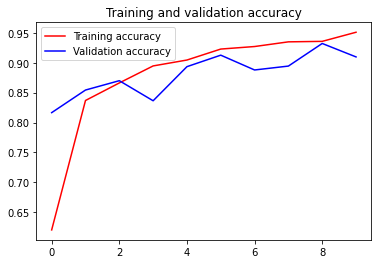

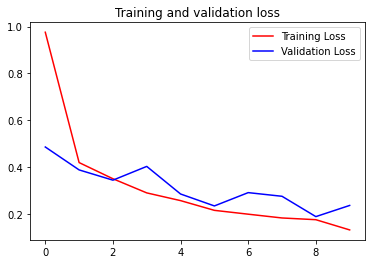

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()